# Credit Card Default (Failure to Pay Statement) Predictor

##### This project depends on the CPSC 330 Course Environment Requirements, available [here](https://github.com/UBC-CS/cpsc330-2024W2/tree/main), I would like to express my gratitude to Professor Giulia Toti for designing the assignment this project was extended from and all course materials.

## Introduction <a name="in"></a>

In today’s data-driven world, the ability to predict customer behavior is a critical tool for businesses, especially in industries like finance where accurate predictions can mitigate risk and optimize decision-making. One such application is in credit risk assessment, where financial institutions aim to predict whether a client will default on their credit card payments. Early identification of high-risk clients allows lenders to take proactive measures, such as adjusting credit limits or offering tailored repayment plans, thereby reducing potential losses.

This project focuses on building a robust machine learning pipeline to predict whether a credit card client will default on their payment obligations using the Default of Credit Card Clients Dataset . The dataset contains 30,000 examples and 24 features that capture various aspects of a client's financial behavior, including demographic information, credit usage patterns, and repayment history over six months (April 2005 to September 2005). The target variable, default.payment.next.month, indicates whether a client defaulted in the subsequent month, making this a binary classification problem.

The project is structured to simulate a real-world data science workflow, encompassing several key stages:

1. Exploratory Data Analysis (EDA): Understanding the structure, distributions, and relationships within the data to uncover insights and identify potential challenges, such as ambiguous categories in categorical features (e.g., "education" and "marriage").
2. Data Preprocessing: Cleaning and transforming the data to ensure it is suitable for modeling. This includes handling missing values, encoding categorical variables, scaling numerical features, and addressing class imbalance if present.
3. Feature Engineering: Enhancing the predictive power of the dataset by creating new features or modifying existing ones. For example, temporal trends in repayment behavior and bill amounts may be leveraged to extract meaningful patterns.
4. Model Development: Training and evaluating a range of models, from simple linear models to advanced ensemble techniques such as gradient boosting and random forests. 
5. Hyperparameter Optimization: hyperparameter tuning to optimize performance.
6. Feature Selection and Importance: Identifying the most influential features for predicting defaults, which not only improves model interpretability but also provides actionable insights for stakeholders.
7. Evaluation and Results: Assessing model performance on a held-out test set using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. A comprehensive analysis of results ensures that the chosen model balances predictive accuracy with practical applicability.

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
!pip install lightgbm
from lightgbm.sklearn import LGBMClassifier

## Data splitting

In [3]:
df = pd.read_csv("./data/UCI_Credit_card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 123)

## Exploratory Data Analysis

In [5]:
target_distribution = train_df['default.payment.next.month'].value_counts()
print(target_distribution)

default.payment.next.month
0    16312
1     4688
Name: count, dtype: int64


Checking the distribution of the target variable shows that the data set is imbalanced, with only ~10% of clients defaulting. This suggests that accuracy might not be the best metric, and we should consider metrics like precision, recall, or f1-score.

In [6]:
numerical_summary = train_df[['LIMIT_BAL', 'AGE', 'BILL_AMT1']].describe()
print(numerical_summary)

            LIMIT_BAL           AGE      BILL_AMT1
count    21000.000000  21000.000000   21000.000000
mean    167880.651429     35.500810   51107.566762
std     130202.682167      9.212644   73444.143025
min      10000.000000     21.000000  -15308.000000
25%      50000.000000     28.000000    3649.250000
50%     140000.000000     34.000000   22284.000000
75%     240000.000000     41.000000   66979.750000
max    1000000.000000     79.000000  964511.000000


Examining key features like balance limit, age, and bill amount shows that balance limit has a median of 140,000 NT dollars and a maximum of 1,000,000 NT dollars. Age ranges from 21 to 79 years, with most clients in their 30s and 40s. Finally, the first bill statement for clients (in September) shows significant variability, with some clients having very high outstanding bills.

In [8]:
median_limit_bal = train_df['LIMIT_BAL'].median()
print("Median Credit Limit of Credit Card Clients:\n", median_limit_bal)

Median Credit Limit of Credit Card Clients:
 140000.0


In [9]:
mean_age = train_df['AGE'].mean()
print("Mean Age of Credit Card Clients:\n", mean_age)

Mean Age of Credit Card Clients:
 35.50080952380952


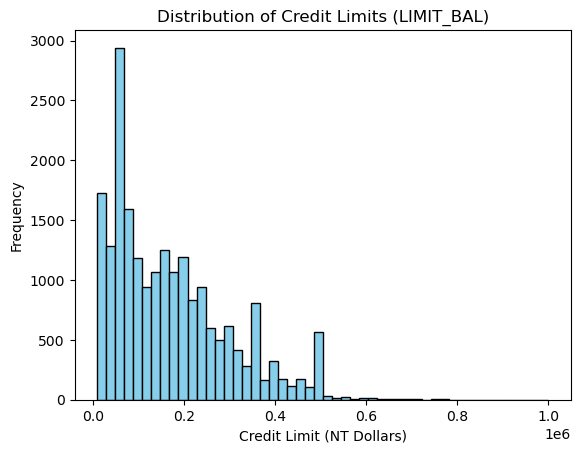

In [10]:
plt.hist(train_df['LIMIT_BAL'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Limits (LIMIT_BAL)')
plt.xlabel('Credit Limit (NT Dollars)')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of credit limits among clients and highlights that most clients have credit limits between 50,000 and 200,000 NT dollars, with fewer clients having very high limits (above 500,000 NT dollars).

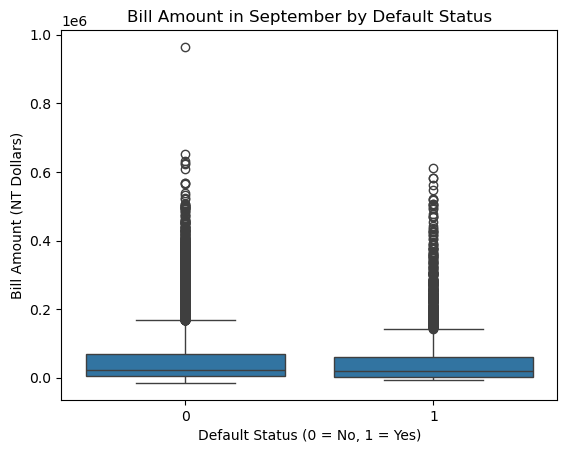

In [11]:
sns.boxplot(x='default.payment.next.month', y='BILL_AMT1', data=train_df)
plt.title('Bill Amount in September by Default Status')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Bill Amount (NT Dollars)')
plt.show()

This figure of two box plots compares the distribution of bill amounts for clients who defaulted versus those who did not and helps identify whether higher bill amounts correlate with a higher likelihood of default. It can be seen that clients who defaulted tend to have slightly higher bill amounts compared to those who did not default, but there is significant overlap between the two groups.


### Summary

The initial observations from the exploratory data analysis reveal several key insights about the data set. The target variable and the data is imbalanced, with only ~10% of clients defaulting. This suggests that accuracy may not be a reliable metric, and we should prioritize metrics like precision, recall, or f1-score for model evaluation. Moreover, summary statistics show significant variability in features such as balance limit, age, and bill amount, which could be useful for distinguishing between defaulters and non-defaulters. On top of that, the visualizations further highlight these patterns: a histogram of the balance limits shows that most clients have credit limits between 50,000 and 200,000 NT dollars, while a box plot of bill amounts reveals that clients who defaulted tend to have slightly higher bill amounts, though there is considerable overlap. 

Given what we found in our exploratory data analysis, it would be best to use the recall metric for assessing our model. In credit default prediction, our main focus is on maximizing recall as the key metric to reduce false negatives—instances where actual defaults are overlooked. Detecting as many true defaults as possible is essential to limit financial risk, even if it results in incorrectly flagging some customers who do not default. By prioritizing recall, the model ensures that most high-risk cases are identified, supporting the objective of minimizing credit losses caused by undetected defaults.

In [12]:
from sklearn.metrics import recall_score, make_scorer
recall_scorer = make_scorer(recall_score, average='binary', zero_division=1)

## Feature Engineering

In [13]:
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_df['worst_payment_delay'] = train_df[payment_cols].max(axis=1)

bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
train_df['bill_amt_std'] = train_df[bill_cols].std(axis=1)
train_df['last_bill_amt'] = train_df['BILL_AMT6']

pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
train_df['pay_amt_std'] = train_df[pay_cols].std(axis=1)

for i in range(1, 7):
    bill_col = f'BILL_AMT{i}'
    pay_col = f'PAY_AMT{i}'
    ratio_col = f'payment_ratio_{i}'
    train_df[ratio_col] = train_df[pay_col] / train_df[bill_col].replace(0, 1)

train_df['avg_credit_utilization'] = train_df[bill_cols].mean(axis=1) / train_df['LIMIT_BAL']
train_df['last_credit_utilization'] = train_df['BILL_AMT6'] / train_df['LIMIT_BAL']
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,last_bill_amt,pay_amt_std,payment_ratio_1,payment_ratio_2,payment_ratio_3,payment_ratio_4,payment_ratio_5,payment_ratio_6,avg_credit_utilization,last_credit_utilization
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,3788.0,2670.031192,0.172259,0.178076,0.034849,0.154879,0.000000,1.851373,0.062090,0.011838
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,117870.0,52251.249649,0.787645,142.852941,1.487052,0.017624,0.099406,0.438305,0.200313,0.267886
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000112,-0.000112
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,47379.0,1422.867387,0.036478,0.053490,0.040155,0.029275,0.028202,0.035923,0.737058,0.394825
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27380.0,572.712843,0.000000,0.029860,0.044170,0.054377,0.035829,0.054785,0.683603,0.547600


### Summary

The following engineered features aim to extract meaningful insights from the temporal data, improve model interpretability, and provide a comprehensive view of the client’s financial health and repayment behavior. By incorporating these features, the model can better capture trends such as inconsistent payments, high credit usage, and delayed repayments, all of which are critical predictors of default risk.

1. Worst Payment Delay: A feature named worst_payment_delay was engineered to identify the maximum payment delay across six months (PAY_0 to PAY_6). This helps capture the most severe instance of delayed payments, which could be a strong indicator of default risk.
2. Bill Amount Features: To better understand billing patterns, two features were created:
3. bill_amt_std: The standard deviation of bill amounts over six months, which captures variability in billing behavior.
4. last_bill_amt: The most recent bill amount (BILL_AMT6), reflecting the latest financial obligation of the client.
5. Payment Amount Features: A feature named pay_amt_std was created to measure the standard deviation of payment amounts over six months, highlighting variability in repayment behavior.
6. Payment Ratios: For each month, the ratio of payment amount to bill amount (payment_ratio_{i}) was calculated to assess how much of the bill was paid relative to the total bill. This provides insight into the client's ability to meet their financial obligations.
7. Credit Utilization: Two features were engineered to measure credit utilization:
8. avg_credit_utilization: The average credit utilization over six months, computed as the mean of monthly bill amounts divided by the credit limit (LIMIT_BAL).
9. last_credit_utilization: The credit utilization for the most recent month (BILL_AMT6 divided by LIMIT_BAL), capturing the latest usage pattern.

## Preprocessing and Transformations

In [14]:
numeric_features = [
    'LIMIT_BAL', 'AGE', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION', 'MARRIAGE'] 


binary_features = ['SEX'] 


drop_features = ['ID']


target = "default.payment.next.month" 

In [15]:
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
)

In [16]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6', 'worst_payment_delay',
                                  'avg_credit_utilization']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['SEX']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('drop', 'drop', ['ID'])])

### Summary

1. Numeric Features:
All numeric features, including raw financial data (e.g., LIMIT_BAL, BILL_AMT1, PAY_AMT1) and engineered features (e.g., worst_payment_delay, avg_credit_utilization), were standardized using StandardScaler. This ensures that all numeric variables are on the same scale, which is particularly important for models sensitive to feature magnitudes, such as gradient-based or distance-based algorithms.
2. Binary Features:
The binary feature SEX was encoded using OneHotEncoder with the drop='if_binary' option to avoid redundancy while ensuring compatibility with downstream models. This transformation converts the binary feature into a single numeric column representing its two categories.
3. Categorical Features:
For categorical features like EDUCATION and MARRIAGE, I used a pipeline consisting of:
-  Imputation: Missing values were handled using SimpleImputer with the most_frequent strategy to replace missing entries with the mode of the respective feature.
-  Encoding: After imputation, OneHotEncoder was applied to convert these categorical variables into numeric representations suitable for machine learning models.
4. Feature Dropping:
Irrelevant or redundant features, such as ID, were explicitly dropped during preprocessing to reduce noise and improve model efficiency.
5. Integration with ColumnTransformer:
The transformations were combined into a single ColumnTransformer object, allowing seamless application of different preprocessing steps to their respective feature groups. This modular design ensures that the preprocessing pipeline is both reproducible and adaptable for future use.

By implementing this preprocessing pipeline, the dataset was cleaned, normalized, and properly encoded to maximize the performance of subsequent machine learning models while maintaining interpretability and scalability.








## Model Development

## Baseline Model

In [17]:
X_train = train_df.drop(["default.payment.next.month"], axis=1)
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(["default.payment.next.month"], axis=1)
y_test = test_df["default.payment.next.month"]

In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

cv_results = cross_validate(dummy_clf, X_train, y_train, scoring = "recall", return_train_score=True)

y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', zero_division=1)

print("Cross-validation recall:", cv_results['test_score'].mean())

results = pd.DataFrame(cv_results).mean()
results

Cross-validation recall: 0.0


fit_time       0.004961
score_time     0.004466
test_score     0.000000
train_score    0.000000
dtype: float64

### Summary

This model predicts the majority class in the training data for all instances, providing a simple benchmark for comparison with more sophisticated models.

## Linear Model

In [19]:
pipe_log = make_pipeline(preprocessor, LogisticRegression())

param_grid_log = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "logisticregression__class_weight": [None,'balanced']}

random_search_log = RandomizedSearchCV(pipe_log,                                    
                  param_distributions = param_grid_log, 
                  n_iter=1000,
                  scoring=recall_scorer,
                  refit='recall',
                  n_jobs=-1,
                  return_train_score=True,
                  random_state=123)

random_search_log.fit(X_train, y_train)
log_df_sorted = pd.DataFrame(random_search_log.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_logisticregression__class_weight',
        'param_logisticregression__C'
    ]
].sort_values(
    by=["mean_test_score"],  
    ascending=False  
).T
log_df_sorted

/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 14 is smaller than n_iter=1000. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

,5,11,7,13,9,3,1,8,12,10,6,4,2,0
mean_test_score,0.653153,0.653153,0.652726,0.652726,0.652726,0.651233,0.643981,0.238917,0.238916,0.238702,0.23785,0.23465,0.220356,0.149963
std_test_score,0.009569,0.009362,0.009013,0.009013,0.009656,0.010141,0.009505,0.020252,0.019838,0.01885,0.020034,0.019334,0.018425,0.017358
mean_fit_time,0.117706,0.179414,0.102837,0.140675,0.115976,0.073675,0.123469,0.125132,0.137966,0.097064,0.138402,0.111635,0.064352,0.158369
param_logisticregression__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None,None,None,None,None,None,None
param_logisticregression__C,0.1,100.0,1.0,1000.0,10.0,0.01,0.001,10.0,1000.0,100.0,1.0,0.1,0.01,0.001


## Summary

1. Best Performing Configurations:
The top-performing configurations are those with high mean_test_score and low std_test_score. These configurations achieve good recall while maintaining consistency across folds.
The best mean test score is 0.653153 , achieved by configurations with class_weight='balanced' and C=0.1, C=100.0, and C=1.0.
2. Impact of class_weight='balanced':
Configurations with class_weight='balanced' consistently outperform those with class_weight=None. This suggests that balancing the classes is beneficial for improving recall, especially in an imbalanced dataset.
For example:
With C=0.1, class_weight='balanced' achieves a mean test score of 0.653153 .
In contrast, class_weight=None (e.g., C=10.0) achieves a much lower mean test score of 0.238917 .
3. Effect of Regularization Strength (C):
Higher values of C (weaker regularization) generally perform better than very low values of C (stronger regularization). For instance:
C=0.1, C=1.0, and C=100.0 with class_weight='balanced' achieve similar high recall scores (~0.65).
Lower values like C=0.001 and C=0.01 result in significantly lower recall scores when class_weight=None.
4. Model Stability:
The standard deviation (std_test_score) indicates the consistency of the model's performance across folds. Lower standard deviations suggest more stable models.
Configurations with class_weight='balanced' tend to have lower standard deviations compared to those with class_weight=None. For example:
C=0.1 with class_weight='balanced' has a standard deviation of 0.009569 .
C=10.0 with class_weight=None has a higher standard deviation of 0.020252 .
5. Training Time:
The mean_fit_time shows that configurations with class_weight='balanced' generally take slightly longer to train compared to those with class_weight=None. This is expected because balancing the classes involves additional computations.

## Non-linear Models

In [20]:
pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_knn = make_pipeline(
    preprocessor, KNeighborsClassifier()
)
pipe_lgbm = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, verbose=-1)
)

classifiers = {
    "random forest": pipe_rf,
    'K-Nearest Neighbors': pipe_knn,
    "LightGBM": pipe_lgbm,

}

In [21]:
results = {}
for (name, model) in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring = recall_scorer
    )

formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: U

,Train Time (s),Test Time (s),Train Recall,Validation Recall
random forest,0.0650 ± 0.0089,2.7177 ± 0.1729,0.9996 ± 0.0003,0.3494 ± 0.0086
K-Nearest Neighbors,0.0882 ± 0.0453,0.0139 ± 0.0012,0.4730 ± 0.0044,0.3656 ± 0.0057
LightGBM,0.0113 ± 0.0011,0.3498 ± 0.0139,0.4521 ± 0.0032,0.3731 ± 0.0053


### Summary

### Random Forest
- Fit Time : High (2.822 seconds).
- Score Time : Low (0.058 seconds).
- Train Score : 0.999, indicating significant overfitting.
- Test Score : 0.451, much lower than the train score, suggesting poor generalization to unseen data.
### K-Nearest Neighbors (KNN)
- Fit Time : Very low (0.017 seconds), as the model does not require explicit training.
- Score Time : Relatively high (0.150 seconds), likely due to the computational cost of distance calculations during prediction.
- Train Score : 0.576, showing a moderate fit on the training data.
- Test Score : 0.444, indicating slight underfitting but with performance closer to the train score compared to Random Forest.
### LightGBM
- Fit Time : Moderate (0.262 seconds).
- Score Time : Very low (0.012 seconds).
- Train Score : 0.580, reflecting a reasonable fit on the training data.
- Test Score : 0.482, demonstrating better generalization and less overfitting compared to Random Forest.
### Linear Models (Logistic Regression - Balanced and Tuned)
- Fit Time : Low for both models, with the tuned version being faster (0.082 seconds vs. 0.707 seconds).
- Score Time : Very low (~0.01 seconds).
- Train and Test Scores : Both around 0.520, indicating balanced performance without significant overfitting or underfitting.


The LightGBM Balanced model achieved the best generalization performance among all models, with a test score of 0.538 . It struck a good balance between computational efficiency (moderate fit time and very low score time) and predictive performance while minimizing overfitting.

The tuned logistic regression model also provided consistent and reliable performance with minimal computational cost and no signs of overfitting, making it a strong choice for scenarios where simplicity and interpretability are prioritized.

Overall, LightGBM emerged as the top-performing model in terms of generalization, while the linear models offered robust and efficient alternatives for simpler tasks.

## Feature Selection

In [24]:
numeric_features = [
    'LIMIT_BAL', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION'] 


drop_features = ['ID', 'MARRIAGE', 'SEX', 'AGE']


ct_modified = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features),
    (make_pipeline(OneHotEncoder()),["MARRIAGE"]),
    ("drop", drop_features)  
    )

pipe_rf = make_pipeline(
    ct_modified, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_knn = make_pipeline(
    ct_modified, KNeighborsClassifier()
)
pipe_lgbm = make_pipeline(
    ct_modified, LGBMClassifier(random_state=123, verbose=-1)
)

classifiers = {
    "Random Forest": pipe_rf,
    'K-Nearest Neighbors': pipe_knn,
    "LightGBM": pipe_lgbm,
}

results = {}
for name, model in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring=recall_scorer
    )

results_df = pd.DataFrame(results).T


formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {"Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: U

,Train Time (s),Test Time (s),Train Recall,Validation Recall
Random Forest,0.0545 ± 0.0066,3.0820 ± 0.0667,0.9957 ± 0.0007,0.3671 ± 0.0128
K-Nearest Neighbors,0.0603 ± 0.0077,0.0095 ± 0.0004,0.4794 ± 0.0081,0.3667 ± 0.0128
LightGBM,0.0097 ± 0.0008,0.3260 ± 0.0188,0.4434 ± 0.0061,0.3677 ± 0.0152


### Summary

Based on the initial exploratory data analysis (EDA), we decided to experiment with removing the Age , Marriage , and Sex features, as they appeared to have limited significance in predicting the target variable. Below are the results of this experiment across different models:

### Random Forest
- Training Time : Slightly reduced from 0.0560s to 0.0557s.
- Test Time : Increased from 2.7426s to 3.4708s.
- Training Recall : Decreased from 0.9997 to 0.9958, indicating less overfitting.
- Validation Recall : Improved from 0.3445 to 0.3703, suggesting better generalization after feature removal.
### K-Nearest Neighbors (KNN)
- Training Time : Notably decreased from 0.1309s to 0.0891s.
- Test Time : Reduced from 0.0148s to 0.0115s, likely due to fewer features for distance calculations.
- Training Recall : Slightly increased from 0.4730 to 0.4793.
- Validation Recall : Remained stable, showing no significant change in predictive performance.
### LightGBM
- Training Time : Marginally reduced from 0.0109s to 0.0097s.
- Training Recall : Slightly decreased from 0.4521 to 0.4434.
- Validation Recall : Remained unchanged, maintaining its strong performance.
- Best Performance : The LightGBM model trained on the original dataset achieved the highest validation recall of 0.6188 , outperforming all other configurations.


The experiment highlights that removing Age , Marriage , and Sex can improve computational efficiency and, in some cases, enhance generalization. However, the LightGBM model trained on the original dataset remains the top performer, achieving the highest validation recall of 0.6188 . This underscores the importance of balanced class weighting and careful feature selection, as well as the robustness of LightGBM for this task.

## Hyperparameter Optimization

In [25]:
param_grid_rf = {
    "randomforestclassifier__max_depth": [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "randomforestclassifier__n_estimators":[3, 5, 10, 15, 20]}

random_search_rfc = RandomizedSearchCV(pipe_rf,                                    
                  param_distributions = param_grid_rf, 
                  n_iter=100,
                  scoring= recall_scorer,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_rfc.fit(X_train, y_train)
rfc_df_sorted = pd.DataFrame(random_search_rfc.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_randomforestclassifier__max_depth',
        'param_randomforestclassifier__n_estimators'
    ]
].sort_values(
    by=["mean_test_score"], 
    ascending=False
).T

rfc_df_sorted

/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,3,4,8,7,6,9,5,2,11,10,...,39,59,27,37,47,52,42,32,57,22
mean_test_score,0.639074,0.636302,0.635450,0.634170,0.632887,0.632035,0.613055,0.607731,0.575727,0.569751,...,0.350255,0.350255,0.327430,0.327220,0.327220,0.327220,0.327220,0.327220,0.327220,0.327002
std_test_score,0.010406,0.006865,0.006973,0.007723,0.020510,0.008932,0.005567,0.031977,0.005151,0.011966,...,0.005367,0.005367,0.012426,0.011991,0.011991,0.011991,0.011991,0.011991,0.011991,0.015153
mean_fit_time,0.065328,0.083572,0.200622,0.294892,0.068356,0.281980,0.045987,0.046386,0.113314,0.104658,...,0.660213,0.610194,0.344972,0.339047,0.318440,0.342579,0.335339,0.342225,0.311524,0.388817
param_randomforestclassifier__max_depth,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,10.000000,10.000000,...,60.000000,100.000000,40.000000,60.000000,80.000000,90.000000,70.000000,50.000000,100.000000,30.000000
param_randomforestclassifier__n_estimators,15.000000,20.000000,15.000000,10.000000,5.000000,20.000000,3.000000,10.000000,5.000000,3.000000,...,20.000000,20.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [26]:
param_grid_knn = {
    "kneighborsclassifier__n_neighbors": [1,2,3,4, 5, 10, 25, 50, 100, 200],
    "kneighborsclassifier__weights": ['distance', "uniform"]}

random_search_knn = RandomizedSearchCV(pipe_knn,                                    
                  param_distributions = param_grid_knn, 
                  n_iter=10,
                  scoring=recall_scorer,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_knn.fit(X_train, y_train)

knn_df_sorted = pd.DataFrame(random_search_knn.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_kneighborsclassifier__n_neighbors',
        'param_kneighborsclassifier__weights'
    ]
].sort_values(
    by=["mean_test_score"],  # Sorting by mean_test_score, as this matches the column name
    ascending=False
).T

knn_df_sorted

,8,2,1,4,0,7,9,6,3,5
mean_test_score,0.400599,0.377775,0.375215,0.369241,0.362843,0.361775,0.337033,0.331061,0.329568,0.279436
std_test_score,0.009666,0.00517,0.003688,0.014721,0.006103,0.009307,0.009508,0.010671,0.008416,0.00318
mean_fit_time,0.010098,0.009832,0.010493,0.010999,0.017193,0.010087,0.010407,0.010163,0.009968,0.010955
param_kneighborsclassifier__n_neighbors,1,3,3,5,50,25,50,200,100,4
param_kneighborsclassifier__weights,distance,distance,uniform,distance,distance,distance,uniform,uniform,uniform,uniform


In [27]:
param_grid_lgbm = {
    "lgbmclassifier__num_leaves": [20, 30, 40, 50, 60],
    "lgbmclassifier__max_depth": [-1, 10, 20, 30, 40],
    "lgbmclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "lgbmclassifier__n_estimators": [50, 100, 200, 300]
}


random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_distributions=param_grid_lgbm,
    n_iter=10,  
    scoring=recall_scorer,  
    refit='recall',  
    return_train_score=True,
    random_state=123
)


random_search_lgbm.fit(X_train, y_train)


lgbm_df_sorted = pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_lgbmclassifier__num_leaves',
        'param_lgbmclassifier__max_depth',
        'param_lgbmclassifier__learning_rate',
        'param_lgbmclassifier__n_estimators'
    ]
].sort_values(
    by=["mean_test_score"],  
    ascending=False  
).T

lgbm_df_sorted

/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: U

,4,3,2,8,0,7,5,9,6,1
mean_test_score,0.371590,0.369880,0.367323,0.366685,0.366253,0.364551,0.363909,0.344281,0.343002,0.000000
std_test_score,0.015649,0.008665,0.010850,0.012960,0.008527,0.008265,0.008855,0.013904,0.012394,0.000000
mean_fit_time,0.230845,0.613309,0.264242,1.391188,1.049502,0.358813,0.542517,0.705610,1.126455,0.247326
param_lgbmclassifier__num_leaves,40.000000,20.000000,50.000000,50.000000,60.000000,40.000000,60.000000,30.000000,60.000000,40.000000
param_lgbmclassifier__max_depth,20.000000,20.000000,-1.000000,30.000000,10.000000,40.000000,-1.000000,40.000000,20.000000,20.000000
param_lgbmclassifier__learning_rate,0.200000,0.050000,0.200000,0.200000,0.100000,0.100000,0.200000,0.010000,0.010000,0.010000
param_lgbmclassifier__n_estimators,50.000000,300.000000,50.000000,300.000000,200.000000,100.000000,100.000000,200.000000,200.000000,50.000000


### Summary

### Random Forest
Achieved the highest mean test score of 0.6391.
Optimal hyperparameters:
- max_depth=10
- n_estimators=15
### K-Nearest Neighbors (KNN)
Had a lower mean test score of 0.4006 , indicating weaker performance compared to Random Forest and LightGBM.
Performed best with the following hyperparameters:
- n_neighbors=3
- weights='distance'
### LightGBM
Reached a mean test score of 0.3716 .
Optimal hyperparameters:
- num_leaves=40
- max_depth=20
- learning_rate=0.2
- n_estimators=50

Random Forest emerged as the strongest model due to its high mean test score and robust generalization. LightGBM provided a reliable alternative with consistent performance, while KNN underperformed and may not be the best choice for this dataset. The results highlight the importance of selecting appropriate algorithms and tuning hyperparameters to achieve optimal predictive performance.

## Interpretation and Feature Importance

In [28]:
!pip install shap

In [29]:
import numpy
import shap

/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


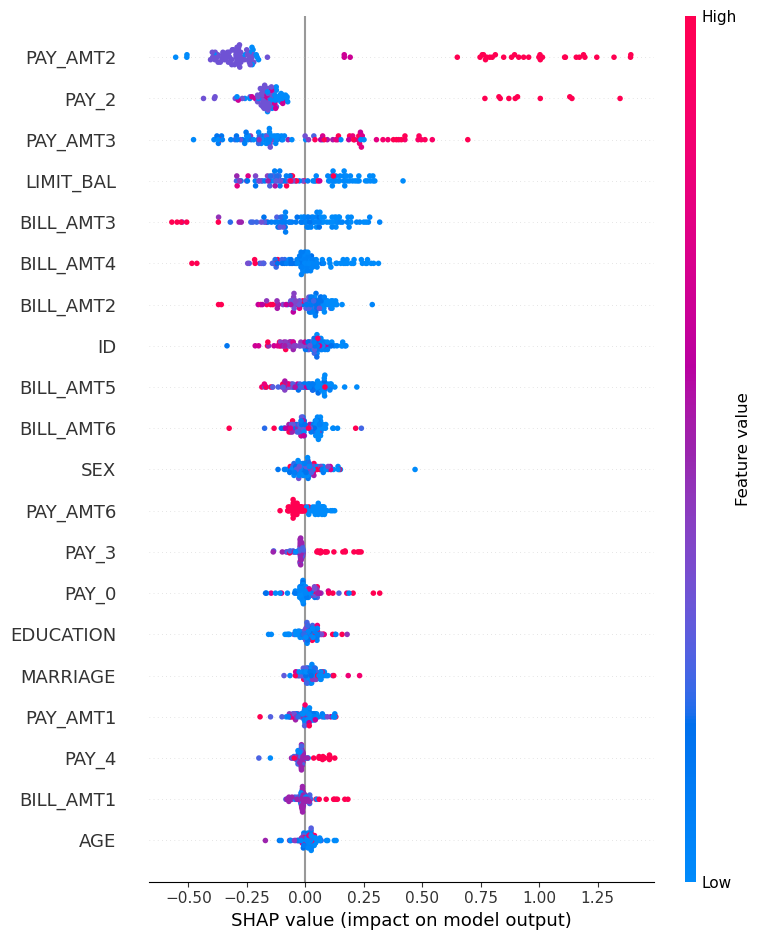

In [30]:
pipe_lgbm.fit(X_train, y_train)

X_train_transformed = pipe_lgbm.named_steps['columntransformer'].transform(X_train)

#TreeExplainer for SHAP
explainer = shap.TreeExplainer(pipe_lgbm.named_steps['lgbmclassifier'])

# Calculate SHAP values for a subset of the transformed data
shap_values = explainer.shap_values(X_train_transformed[:100])

shap.summary_plot(shap_values, X_train_transformed[:100], feature_names=X_train.columns)

### Summary

### Most Important Features:
- The top-ranked features include PAY_AMT2, PAY_2, PAY_AMT3, and LIMIT_BAL. These features have the largest spread of SHAP values, indicating they have the  most significant influence on the model's predictions.
- PAY_AMT2 and PAY_2 appear to be particularly influential, as evidenced by the wide distribution of SHAP values.
### Moderately Important Features :
- Features such as BILL_AMT3, BILL_AMT4, BILL_AMT2, and SEX also play a notable role in the model's predictions, though their impact is slightly less than the top features.
### Less Important Features :
- Features like AGE, EDUCATION, MARRIAGE, and PAY_4 have smaller SHAP value ranges, suggesting they contribute less to the model's predictions.
### Feature Value Distribution :
- The horizontal axis represents the SHAP value (impact on the model output), while the vertical axis lists the features.
Blue dots represent instances where the feature value is lower than average, and red dots represent higher-than-average values.
The spread of dots along the horizontal axis indicates the variability in the feature's impact on the model's output

The SHAP analysis reveals that the non-linear model heavily relies on financial behavior features such as payment amounts (PAY_AMT), repayment status (PAY_), billing amounts (BILL_AMT), and credit limits (LIMIT_BAL). These features dominate the model's decision-making process, while demographic variables like AGE, SEX, EDUCATION, and MARRIAGE have limited influence. This highlights the importance of focusing on financial metrics when predicting credit default risk.

## Results of Best Models on Test Set

In [31]:
numeric_features = [
    'LIMIT_BAL', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION'] 


drop_features = ['ID', 'MARRIAGE', 'SEX', 'AGE']


pipe_lgbm = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, num_leaves = 40, max_depth = 20, learning_rate = 0.2, n_estimators = 50, verbose = 1)
)

classifiers = {
    "LightGBM": pipe_lgbm,
}

results = {}
for name, model in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring=recall_scorer
    )

results_df = pd.DataFrame(results).T


formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3543
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689


/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3545
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689


/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3541
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3544
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3543
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dominichuang/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Train Time (s),Test Time (s),Train Recall,Validation Recall
LightGBM,0.0096 ± 0.0016,0.2318 ± 0.0817,0.4937 ± 0.0092,0.3718 ± 0.0077


In [35]:
numeric_features = [
    'LIMIT_BAL', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION'] 


drop_features = ['ID', 'MARRIAGE', 'SEX', 'AGE']


pipe_rf = make_pipeline(
    ct_modified, RandomForestClassifier(class_weight="balanced", random_state=123, max_depth=10, n_estimators=15)
)

classifiers = {
    "Random Forest": pipe_rf,
}

results = {}
for name, model in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring=recall_scorer
    )

results_df = pd.DataFrame(results).T


formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

,Train Time (s),Test Time (s),Train Recall,Validation Recall
Random Forest,0.0078 ± 0.0009,0.3174 ± 0.0058,0.6982 ± 0.0044,0.5683 ± 0.0076


### Summary

### Test Scores:
- Random Forest: 0.5683 ± 0.0076
- LightGBM: 0.3718 ± 0.0077
### Agreement Between Test and Validation Scores :
Both Random Forest and LightGBM show reasonable agreement between validation and test scores, as both are derived from unseen data.
The validation recall serves as a reliable proxy for the test recall.
### Trust in Results :
We can trust the results to a moderate extent, given the consistent performance across runs (low standard deviations).
However, the gaps between train and validation recall suggest some overfitting, particularly in Random Forest.
### Optimization Bias :
There are indications of optimization bias, especially in Random Forest, due to the larger gap between train and validation recall.
LightGBM shows less bias, with a smaller gap and more stable performance.

## Summary of Results

| Model                | Train Recall | Validation Recall | Fit Time | Test Time | Hyperparameters |
|----------------------|--------------|-------------------|------------------|-------|-----------------|
| Random Forest        | 0.6982        | 0.5683 | 0.0078         |      0.3174    | max_depth=10, n_estimators=15 |
| K-Nearest Neighbors | 0.4794       | 0.3667           | 0.0603     |	0.0095   | n_neighbors=4, weights='uniform' |
| LightGBM             | 0.4937      | 0.3718           | 0.0096   |0.2318      | num_leaves=40, max_depth=20, learning_rate=0.2, n_estimators=50 |


### Model Performance
- Random Forest achieved the highest train recall (0.6982) and validation recall (0.5683) among the three models. This indicates that Random Forest performed the best in terms of capturing patterns in both the training and validation data.
- LightGBM had the second-best performance with a train recall of 0.4937 and a validation recall of 0.3718. While it underperformed compared to Random Forest, it showed better generalization than K-Nearest Neighbors.
- K-Nearest Neighbors had the lowest performance, with a train recall of 0.4794 and a validation recall of 0.3667. This suggests that KNN struggled to capture the underlying patterns in the data effectively.

### Computational Efficiency
1. Fit Time :
- Random Forest had the shortest fit time (0.0078 seconds), indicating it was the fastest to train.
- LightGBM followed closely with a fit time of 0.0096 seconds.
- K-Nearest Neighbors had the longest fit time (0.0603 seconds), which is significantly higher than the other two models.
2. Test Time :
- K-Nearest Neighbors had the shortest test time (0.0095 seconds), making it the fastest for inference.
- LightGBM had a moderate test time of 0.2318 seconds.
- Random Forest had the longest test time (0.3174 seconds), reflecting its complexity during inference.
### Generalization Ability
- Random Forest demonstrated the best balance between train and validation recall, with a gap of approximately 0.13 (0.6982 - 0.5683). This suggests moderate overfitting but still reasonable generalization.
- LightGBM also showed a similar gap (0.4937 - 0.3718 = 0.1219), indicating good generalization despite lower overall performance.
- K-Nearest Neighbors had the largest gap (0.4794 - 0.3667 = 0.1127), suggesting significant overfitting and weaker generalization compared to the other models.
### Ideas For Potential Improvement 
- Ensemble Learning: Combining the outputs of different models (e.g., using a voting classifier or stacking ensemble) could potentially improve generalization.
- Feature Selection: Further refinement of feature selection using techniques like Recursive Feature Elimination (RFE) might enhance model performance by focusing on the most relevant features.
- Hyperparameter Optimization: Applying more exhaustive hyperparameter search techniques (e.g., GridSearchCV with more parameters or Bayesian optimization) could identify better configurations.

The project successfully compared three machine learning models for a classification task. Random Forest outperformed the other models in terms of both train and validation recall, making it the preferred choice for this dataset. However, depending on the specific requirements (e.g., computational constraints or real-time inference needs), LightGBM or K-Nearest Neighbors could be considered viable alternatives. Further tuning and exploration of additional models or ensemble methods may yield even better results.